In [105]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import myst_nb

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

(ch:eda_multi)=
# Comparisons in Multivariate Settings

When we examine a distribution or relationship, we often want to compare it
across subgroups of the data. This process of conditioning on additional
factors often leads to visualizations that involve three or more variables.
In this section, we'll explain how to read plots that are commonly used to
visualize multiple variables at once.

We'll continue to work with the `dogs` dataframe:

In [106]:
dogs = pd.read_csv('data/akc.csv')
dogs

,breed,group,score,longevity,...,size,weight,height,repetition
0,Border Collie,herding,3.64,12.52,...,medium,NaN,51.0,<5
1,Border Terrier,terrier,3.61,14.00,...,small,6.0,NaN,15-25
2,Brittany,sporting,3.54,12.92,...,medium,16.0,48.0,5-15
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,13.17,...,small,8.0,38.0,25-40
170,Wirehaired Pointing Griffon,sporting,NaN,8.80,...,medium,NaN,56.0,25-40
171,Xoloitzcuintli,non-sporting,NaN,NaN,...,medium,NaN,42.0,NaN


{numref}`Figure %s <lon-vs-height-by-reps>`
is an example where we compare the relationship between height and
longevity across repetition categories. Note that we collapsed the repetition
categories into <15, 15-25, 25-40, and 40+. Each groups has about 30 breeds in
it.  The points in the scatter plot have been color-coded according to
repetition category. We have also added lines to this plot that summarize the
relationship for each group.  We find a weak linear association between
longevity and height. The association is negative, meaning that the larger
breeds tend to have a shorter lifespan.  Another interesting feature we see is
that three of the lines are similar, and the fourth line (for the 40+
repetitions) is roughly parallel to the others and about 1.5 years below.  In
other words, for breeds of a particular height, those that take at least 40
repetitions to learn a new command live about 1.5 years less on average than
others.


In [126]:
rep_replacements = {
    '80-100': '40+', '40-80': '40+', 
    '<5': '<15', '5-15': '<15',
}
dogs = dogs.assign(
    repetition=dogs['repetition'].replace(rep_replacements))

In [139]:
# Store plot
sns.lmplot(data=dogs,
           x='height', y='longevity', hue='repetition',
           ci=False,
           markers=['o', 'X', 'd', '*'],
)

myst_nb.glue('lon-vs-height-by-reps', plt.gcf(), display=False)
plt.close();

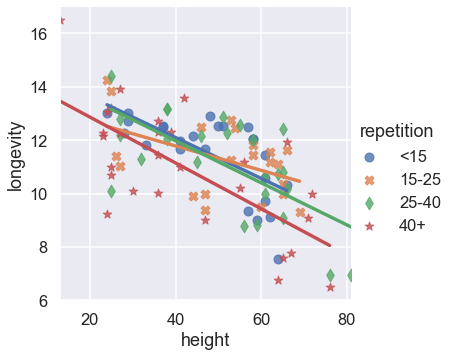

In [138]:
sns.lmplot(data=dogs,
           x='height', y='longevity', hue='repetition',
           ci=False,
           markers=['o', 'X', 'd', '*'],
)

```{glue:figure} lon-vs-height-by-reps
:name: lon-vs-height-by-reps

Scatter plot of longevity vs. height, facetted by repetition.
For each repetition level, we also plot the best-fit regression line.
```

However, this plot would become more challenging to interpret if there were
more levels within the `repetition` feature.
Next, we cover additional plotting techniques that help make comparisons and
uncover structure for three or more features.

**Combinations Across Groups**. When we examine relationships between
qualitative features, we examine proportions of one feature within subgroups
defined by other feature(s). In the 
previous section,
Figures {numref}`%s <kids-vs-size-band-plot>` and
{numref}`%s <points-kids-props>`
show such comparisons between
two qualitative features. With three (or more) qualitative features, we can
subdivide the data according to the combinations of levels of these features
and compare proportions with line plots, dot charts, side-by-side bar charts,
mosaic plots, etc. We typically organize the lines, dots, and bars into groups
according to a combination of levels from two (or more) features.

**Panels of Scatter Plots**.
As displayed earlier in this section,
{numref}`Figure %s <lon-vs-height-by-reps>`
shows how to use symbol shape and color
to represent qualitative features.  These distinctions enable us to
examine the relationship between three variables (2 quantitative and 1
qualitative). Another technique for examining these multivariable relationships
is to make a grid of conditional plots.

{numref}`Figure %s <lon-vs-height-multiples>`
is an example of a facet plot where each individual plot shows the
relationship between longevity and height for a different range of repetitions.
By separating scatterplots, we can assess how the relationship between two
quantitative values changes across the subgroups. We can also see the range of
height and longevity for each repetition range.

In [146]:
# Store plot
sns.lmplot(data=dogs,
           x='height', y='longevity',
           col='repetition', col_wrap=2,
           ci=False,
           aspect=1.3,
);

myst_nb.glue('lon-vs-height-multiples', plt.gcf(), display=False)
plt.close();

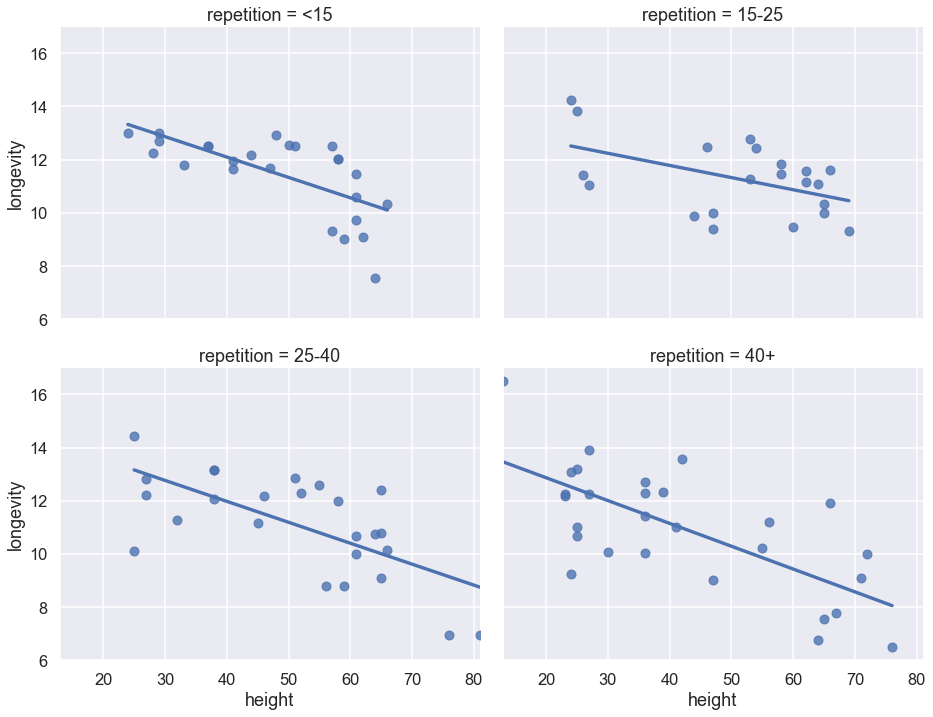

In [145]:
sns.lmplot(data=dogs,
           x='height', y='longevity',
           col='repetition', col_wrap=2,
           ci=False,
           aspect=1.3,
);

```{glue:figure} lon-vs-height-multiples
:name: lon-vs-height-multiples

We repeat the same plot across each facet of `repetition`.
By keeping the axes limits the same for each plot, we can make comparisons.
This plotting technique is also called creating a "small multiple".
```

Small multiples like this one are convenient---they let us see whether the
relationship between longevity and height holds across repetition groups.

**Groups and Subgroups of Box Plots.** We have seen in the previous section
({numref}`Figure %s <box-height-by-size>`)
that we can compare the basic shape of a distribution across
subgroups with side-by-side box plots. When we have two or more qualitative
features, we can organize the box plots into groups according to one of the
qualitative features.

**Curse of Dimensionality**. Comparisons that involve more than one categorical
variable can quickly become cumbersome as the number of possible combinations
of categories grows. For example, there are 3 × 4 = 12 size–repetitions
combinations (if we had kept the original categories for repetitions, we would
have 18 combinations). Examining a distribution across 12 subgroups can be
difficult. Further, we come up against the problem of having too few
observations in some subgroups. Although, there are nearly 200 rows in the dogs
data frame, half of the size–repetition combinations have 10 or fewer
observations. (This is compounded by losing an observation when one feature has
a missing value.) This "curse of dimensionality" also arises when we compare
relationships with quantitative data. With just three quantitative variables,
some of the scatter plots in a facet plot can easily have too few observations
to confirm the shape of the relationship between two variables for the
subgroups.

## In the Next Section

Now that we've seen practical examples of visualizations that are commonly
used in exploratory data analysis, we proceed in the next section to discuss
high-level guidelines for EDA.